<a href="https://colab.research.google.com/github/kimyuji/BOAZ_Assignment/blob/master/15%EA%B8%B0_%EB%B6%84%EC%84%9D_2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석 2주차 과제

### 1. train data set을 DataFrame으로 불러온 후, 기존 피쳐가 아닌 새로운 feature를 2개 이상 만들어주세요.
### (1주차 과제로 만들었던 feature를 사용하셔도 무관합니다.)
왜 그러한 Feature를 만들었는지 이유도 작성해주세요!

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [ ]:
df['zipcode']=df['zipcode'].astype('object')

#### 변수 설명_ kaggle 참조
- id : Unique ID for each home sold
- date : Date of the home sale
- price : Price of each home sold
- bedrooms : Number of bedrooms
- bathrooms : Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living : Square footage of the apartments interior living space
- sqft_lot : Square footage of the land space
- floors : Number of floors
- waterfront : A dummy variable for whether the apartment was overlooking the waterfront or not
- view : An index from 0 to 4 of how good the view of the property was
- condition : An index from 1 to 5 on the condition of the apartment,
- grade : An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an - average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above : The square footage of the interior housing space that is above ground level
- sqft_basement : The square footage of the interior housing space that is below ground level
- yr_built : The year the house was initially built
- yr_renovated : The year of the house’s last renovation
- zipcode : What zipcode area the house is in
- lat : Lattitude
- long : Longitude
- sqft_living15 : Square footage of the apartments interior living space in 2015
- sqft_lot15 : Square footage of the land space in 2015

### Feature추가 1: Age
신축 이후 판매 시점까지 주택이 얼마나 오래됐는지를 보여주는 변수

In [ ]:
df['year'] = [int(i[0:4]) for i in df['date']]
df['yr_built']=pd.to_numeric(df['yr_built'])

In [ ]:
df['Age']=df['year']-df['yr_built']

In [ ]:
df['Age']

0        59
1        82
2        28
3        19
4        52
         ..
15030     0
15031     6
15032     5
15033     1
15034     6
Name: Age, Length: 15035, dtype: int64

### Feature 추가 2: Satisfaction
Grade 변수에서 1~4점은 'dissatisfied'=1, 5~9점은 'somewhat satisfied'=2, 10~13점은 'satisfied'=3으로 점수를 부여한 만족도 점수입니다. 


In [ ]:
df['grade']=pd.to_numeric(df['grade'])

In [ ]:
def grading(i):
    if i<=4: return 1
    elif i<=9: return 2
    else: return 3

In [ ]:
df['Satisfaction']=[grading(i) for i in df['grade']]

In [ ]:
df['Satisfaction']

0        2
1        2
2        2
3        2
4        2
        ..
15030    2
15031    2
15032    2
15033    2
15034    2
Name: Satisfaction, Length: 15035, dtype: int64

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,Age,Satisfaction
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,2
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,2
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,2
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,19,2
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,52,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,2014,0,98056,47.5137,-122.167,2520,6023,2014,0,2
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,2009,0,98136,47.5537,-122.398,2050,6200,2015,6,2
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,2
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,1,2


In [ ]:
df.drop(['date', 'year', 'grade'], axis=1, inplace=True)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Age,Satisfaction
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,59,2
1,1,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,82,2
2,2,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,28,2
3,3,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,0,1995,0,98003,47.3097,-122.327,2238,6819,19,2
4,4,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,0,1963,0,98198,47.4095,-122.315,1650,9711,52,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,610685.0,4,2.50,2520,6023,2.0,0,0,3,...,0,2014,0,98056,47.5137,-122.167,2520,6023,0,2
15031,15031,1007500.0,4,3.50,3510,7200,2.0,0,0,3,...,910,2009,0,98136,47.5537,-122.398,2050,6200,6,2
15032,15032,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2
15033,15033,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,1,2


In [ ]:
#회귀 모델을 돌리기 전에 인코딩을 해주셔야 합니다!
df = pd.get_dummies(df)


### 2. Feature Engineering 이후의 df에 대하여 regression 모델을 적용하여(LinearRegression, Ridge, Lasso) train하고, prediction 하여 rmse값을 비교하세요.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
label = df['price']
feature = df.drop('price',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=129)

In [ ]:
# LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('RMSE값 :', round(mean_squared_error(y_test, lin_reg.predict(X_test), squared=False),3))

RMSE값 : 164014.059


In [ ]:
#Ridge
ridge_reg = Ridge()  # default: alpha=1
ridge_reg.fit(X_train, y_train)
print('RMSE값 :', round(mean_squared_error(y_test, ridge_reg.predict(X_test), squared=False),3))

RMSE값 : 164372.414


In [ ]:
#Lasso
lasso_reg = Lasso()  # default: alpha=1
lasso_reg.fit(X_train, y_train)
print('RMSE값 :', round(mean_squared_error(y_test, lasso_reg.predict(X_test), squared=False),3))

RMSE값 : 164048.361


C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156651140127228.78, tolerance: 163733150102.00433
  positive)


결과를 비교해주세요! <br/>
(< means better) <br/>
### Ridge < Lasso < LinearRegression

<br/>

### 3. price의 분포도가 왜곡되어 있습니다. 정규화를 한 후 선형모델을 이용하여 rmse 값의 변화를 확인하세요. 

왜곡된 분포에 대하여 정규화해야하는 이유도 설명해주세요.

A)
- 단위를 맞춤으로써 범위에 따른 왜곡을 줄여, 더 정확한 모델링을 할 수 있습니다. 
- 딥러닝에서 수렴속도를 감소시킬 수 있습니다.

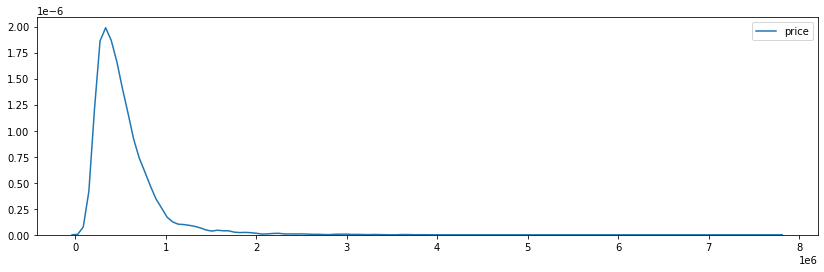

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (14,4)
sns.kdeplot(df['price'])
plt.show()

In [ ]:
#정규화 하세요 #MinMax Scaler없이.. 겠죠?
ran=df['price'].max()-df['price'].min()
df['price']=[(df['price'][i]-df['price'].min())/ran for i in range(len(df['price']))]

In [ ]:
label = df['price']
feature = df.drop('price',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=129)

In [ ]:
lasso_reg = Lasso() 
lasso_reg.fit(X_train, y_train)
print('RMSE값 :', round(mean_squared_error(y_test, lasso_reg.predict(X_test), squared=False),3))

RMSE값 : 0.035


### 4. 빈칸을 채우고 iris_df 데이터셋과 iris_df_scaled 데이터셋의 차이를 말해주세요.


MinMaxScaler를 쓰기 전 후 비교, 왜 쓰는지(장점), MinMaxScaler의 단점 등에 대해 말해주세요.

A)
- scaling 전: 4개의 feature가 각기 다른 범위를 가지고 있습니다
- scaling 후: 4개의 feature가 [0,1]이라는 동일한 범위를 가지고 있습니다
- scaling 이유: 범위에 따른 왜곡을 줄일 수 있습니다. 
- MinMaxScaler의 단점: 이상치의 영향을 크게 받습니다. 

In [ ]:
from sklearn.datasets import load_iris

#iris 데이터셋 로드
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler=MinMaxScaler()

#MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 변환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


### 5. 3개의 그래프 중에서 무엇이 언더피팅, 오버피팅인지 설명해주세요.


* 그래프를 보고 무엇이 언더피팅, 오버피팅인지 설명하기
* 언더피팅 해결법 1가지와 오버피팅 해결법 3가지 이상 설명하기

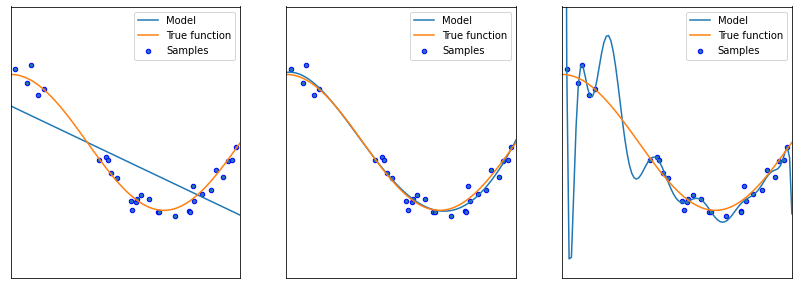

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15] #차수

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
plt.show()

### 답안 작성
왼쪽 그래프가 **언더피팅**되었습니다.<br/>
언더피팅을 해결하기 위한 방법 중 하나는 feature수를 늘리는 것입니다. <br/>
오른쪽의 그래프가 **오버피팅**되었습니다. <br/>
오버피팅을 해결하기 위한 방법에는, 라쏘회귀, 릿지회귀, 엘라스틱넷을 활용하여 모델에 규제를 추가하는 것이 있습니다. <br/>

# 수고하셨습니다:)